<a href="https://colab.research.google.com/github/Akshaay23/learning_practice/blob/main/CAT_Vs_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ./kaggle

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
/content/kaggle.json

In [10]:
!kaggle datasets list


ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                            Car Price Dataset                                   135KB  2025-01-26 19:53:28          14985        231  1.0              
vinothkannaece/sales-dataset                                        sales dataset                                        27KB  2025-02-18 05:13:42           1776         27  1.0              
adilshamim8/global-traffic-accidents-dataset                        Global Traffic Accidents Dataset                    292KB  2025-02-06 08:18:10           1293         25  1.0              
adilshamim8/sleep-cycle-and-productivity

In [12]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [13]:
!kaggle datasets list


ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                            Car Price Dataset                                   135KB  2025-01-26 19:53:28          14985        231  1.0              
vinothkannaece/sales-dataset                                        sales dataset                                        27KB  2025-02-18 05:13:42           1776         27  1.0              
adilshamim8/global-traffic-accidents-dataset                        Global Traffic Accidents Dataset                    292KB  2025-02-06 08:18:10           1293         25  1.0              
adilshamim8/sleep-cycle-and-productivity

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:48<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [14]:
!mkdir -p /content/dataset
!cp -r /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/* /content/dataset/


In [15]:
import os

dataset_path = "/content/dataset"
print(os.listdir(dataset_path))  # Should show 'train', 'test', or image files


['test', 'dogs_vs_cats', 'train']


In [16]:
! pip3 install tensorflow numpy matplotlib keras

In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array

In [21]:
cat_directory_path = "/content/dataset/dogs_vs_cats/train/cats"
dog_directory_path = "/content/dataset/dogs_vs_cats/train/dogs"

In [22]:
len(os.listdir(cat_directory_path))

10000

In [23]:
len(os.listdir(dog_directory_path))

10000

loading some of the images

cv2 or numpy or PIL image

array([[[ 32,  63,  94],
        [ 30,  61,  92],
        [ 30,  61,  92],
        ...,
        [ 60,  63,  54],
        [ 60,  63,  54],
        [ 60,  63,  54]],

       [[ 30,  61,  92],
        [ 30,  61,  92],
        [ 31,  62,  93],
        ...,
        [ 59,  62,  53],
        [ 59,  62,  53],
        [ 60,  63,  54]],

       [[ 23,  56,  89],
        [ 23,  56,  89],
        [ 26,  59,  92],
        ...,
        [ 59,  62,  53],
        [ 59,  62,  53],
        [ 60,  63,  54]],

       ...,

       [[114, 138, 192],
        [114, 138, 192],
        [116, 137, 192],
        ...,
        [ 76,  22,   0],
        [ 77,  23,   0],
        [ 86,  27,   7]],

       [[115, 139, 193],
        [114, 138, 192],
        [116, 137, 192],
        ...,
        [ 77,  23,   0],
        [ 75,  21,   0],
        [ 91,  32,  12]],

       [[116, 140, 194],
        [115, 139, 193],
        [117, 138, 193],
        ...,
        [ 78,  24,   1],
        [ 77,  23,   0],
        [ 93,  34,  14]]], dtype=uint8)
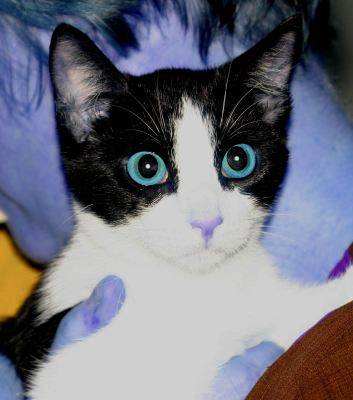

In [28]:
cat_image ='/content/dataset/dogs_vs_cats/train/cats/cat.1009.jpg'
import cv2
img = cv2.imread(cat_image)
#plt.imshow(img)
img

In [29]:
print(img)

[[[ 32  63  94]
  [ 30  61  92]
  [ 30  61  92]
  ...
  [ 60  63  54]
  [ 60  63  54]
  [ 60  63  54]]

 [[ 30  61  92]
  [ 30  61  92]
  [ 31  62  93]
  ...
  [ 59  62  53]
  [ 59  62  53]
  [ 60  63  54]]

 [[ 23  56  89]
  [ 23  56  89]
  [ 26  59  92]
  ...
  [ 59  62  53]
  [ 59  62  53]
  [ 60  63  54]]

 ...

 [[114 138 192]
  [114 138 192]
  [116 137 192]
  ...
  [ 76  22   0]
  [ 77  23   0]
  [ 86  27   7]]

 [[115 139 193]
  [114 138 192]
  [116 137 192]
  ...
  [ 77  23   0]
  [ 75  21   0]
  [ 91  32  12]]

 [[116 140 194]
  [115 139 193]
  [117 138 193]
  ...
  [ 78  24   1]
  [ 77  23   0]
  [ 93  34  14]]]


# building the model

In [30]:
base_dir = "/content/dataset/dogs_vs_cats/train"
train_datagen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [33]:
# using 20% data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150), # resize image to 150x150
    batch_size=20,
    class_mode='binary',
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle= False  # disable shuffing for validation data
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [34]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [35]:
# building model
model = models.Sequential([
    # layer 1
    layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)),
    layers.MaxPooling2D(2,2),

    # layer 2
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

     # layer 3
    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

     # layer 4
    layers.Conv2D(512,(3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,529,665 (51.61 MB)

 Trainable params: 13,529,665 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

input shape = 150,150,3
3*3*3
n-k+1 == > 150 -3 +1 = 148
148 * 148 *32

None = The None means that the batch size is flexible.This means that the model can process a variable number of images at once.


### **How the Shape Changes Across Layers**
Let’s analyze how the dimensions change:

1. **Conv2D Layer 1**  
   - Input: `(None, 150, 150, 3)` (150×150 RGB image)  
   - Kernel: `3×3`,  **Stride = 1**, **Padding = valid (no padding)**  
   - Output: `(None, 148, 148, 32)`  

2. **MaxPooling2D** (2×2 pooling)  
   - Reduces height & width by half:  
   - Output: `(None, 74, 74, 32)`  

3. **Conv2D Layer 2**  
   - Kernel: `3×3`, **Stride = 1**, **Padding = valid**  
   - Output: `(None, 72, 72, 64)`  

4. **MaxPooling2D (2×2)**  
   - Output: `(None, 36, 36, 64)`  

5. **Conv2D Layer 3**  
   - Output: `(None, 34, 34, 128)`  

6. **MaxPooling2D (2×2)**  
   - Output: `(None, 17, 17, 128)`  

7. **Conv2D Layer 4**  
   - Output: `(None, 15, 15, 512)`  

8. **MaxPooling2D (2×2)**  
   - Output: `(None, 7, 7, 512)`  

9. **Flatten Layer**  
   - Converts `(7, 7, 512)` → **1D vector of size `25088`**  
   - Output: `(None, 25088)`

10. **Dense (Fully Connected Layer)**  
   - 512 neurons  
   - Output: `(None, 512)`

11. **Final Dense Layer**  
   - 1 neuron (binary classification: **cat vs. dog**)  
   - Output: `(None, 1)`

---

### **Final Summary**
- The `None` means that the **batch size is flexible**.  
- The **image size reduces** due to **convolutions and pooling**.  
- The **Dense layers** process the extracted features for classification.  


In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [38]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.5318 - loss: 0.6958 - val_accuracy: 0.6150 - val_loss: 0.6623
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.6325 - loss: 0.6362 - val_accuracy: 0.7038 - val_loss: 0.5816
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.7366 - loss: 0.5271 - val_accuracy: 0.7847 - val_loss: 0.4537
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.8085 - loss: 0.4155 - val_accuracy: 0.8055 - val_loss: 0.4215
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8544 - loss: 0.3298 - val_accuracy: 0.8070 - val_loss: 0.4114
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8954 - loss: 0.2448 - val_accuracy: 0.8198 - val_loss: 0.4247
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.9363 - loss: 0.1617 - val_accuracy: 0.8485 - val_loss: 0.4113
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9648 - loss: 0.0903 - val_accurac

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.5534999966621399, 0.6643750071525574, 0.7503125071525574, 0.8099374771118164, 0.8567500114440918, 0.8979374766349792, 0.9336875081062317, 0.9621875286102295, 0.9757500290870667, 0.9825624823570251]
[0.6150000095367432, 0.7037500143051147, 0.7847499847412109, 0.8054999709129333, 0.8069999814033508, 0.8197500109672546, 0.8485000133514404, 0.8517500162124634, 0.847000002861023, 0.8360000252723694]
[0.6831468343734741, 0.6085321307182312, 0.5047252774238586, 0.41052648425102234, 0.32814282178878784, 0.24208368360996246, 0.16216064989566803, 0.09594345092773438, 0.06940963119268417, 0.05129947140812874]
[0.662338376045227, 0.5816181302070618, 0.453661173582077, 0.42150846123695374, 0.41136109828948975, 0.4247226119041443, 0.4113404452800751, 0.5207894444465637, 0.607387363910675, 0.6695312857627869]


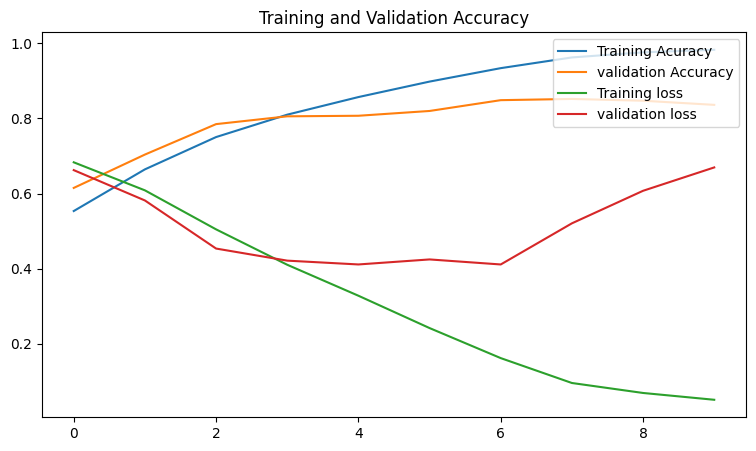

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label='Training Acuracy')
plt.plot(epochs_range, val_acc, label='validation Accuracy')
plt.legend(loc= 'lower right' )
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='validation loss')
plt.legend(loc= 'upper right' )
plt.title('Training and Validation Accuracy')
plt.show()



testing

In [41]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir ='/content/dataset/dogs_vs_cats/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    shuffle=False)

Found 5000 images belonging to 2 classes.


In [42]:
# evaluting the model
test_loss, test_acc = model.evaluate(test_generator, steps = len(test_generator))
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

  1/250 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9500 - loss: 0.1837

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8570 - loss: 0.6195
Test Accuracy: 0.8407999873161316
Test Loss: 0.6883348226547241


In [43]:
# confusion matrix
# single image prediction
probability = model.predict(test_generator)
probability

250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step


array([[1.8762182e-13],
       [2.5847176e-04],
       [2.1376396e-03],
       ...,
       [9.9856454e-01],
       [8.8127607e-01],
       [2.1006221e-01]], dtype=float32)

In [44]:
predicted_classes = (probability > 0.5).astype(int).squeeze()
predicted_classes

array([0, 0, 0, ..., 1, 1, 0])

In [45]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [46]:
class_labels = list(test_generator.class_indices.keys())
predicted_labels = [class_labels[i] for i in predicted_classes]


In [47]:
# get true labels from generator
true_classes = test_generator.classes


# generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

cm

array([[2162,  338],
       [ 458, 2042]])

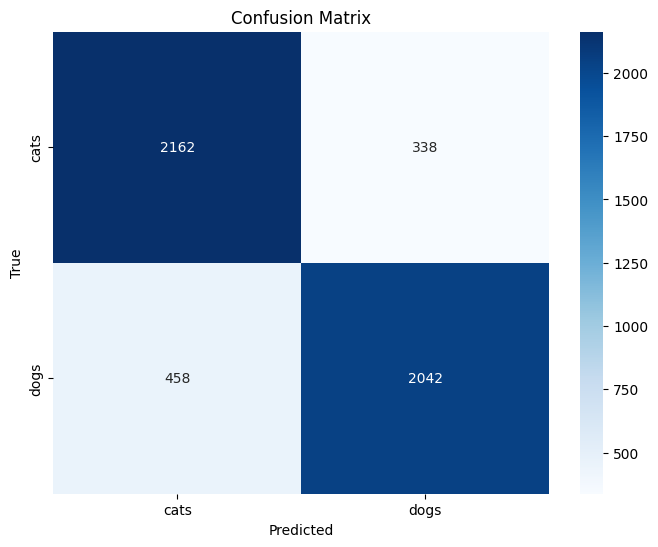

In [48]:
# ploting with seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
test_image = '/content/dataset/dogs_vs_cats/test/cats/cat.10000.jpg'

img = load_img(test_image, target_size=(150,150))
img_array = img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
expanded_img_array = expanded_img_array/255.0
prediction = model.predict(expanded_img_array)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.00025847]]


In [54]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(150, 150))  # Load and resize image
    img_array = img_to_array(img)  # Convert image to array
    expanded_img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = expanded_img_array / 255.0  # Normalize

    # Make prediction
    prediction = model.predict(img_array)
    predicted_label = "Dog" if prediction[0][0] > 0.5 else "Cat"

    print(f'Prediction Score: {prediction[0][0]:.4f}')
    print(f'Predicted Label: {predicted_label}')

    # Plot original image
    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original Image')

    # Display prediction
    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {predicted_label}')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction Score: 0.0003
Predicted Label: Cat


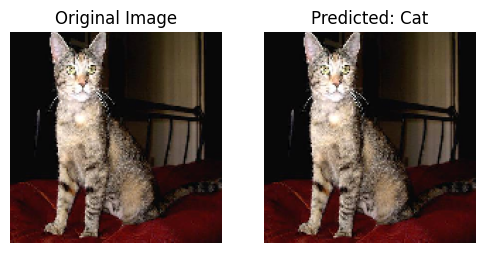

In [55]:
# load and process the image
img_path= '/content/dataset/dogs_vs_cats/test/cats/cat.10000.jpg'

predict_image(img_path)